# Infomación de entrega

**Nombre estudiante:** `Sebastián Latorre Diaz`


## 0) Setup

In [ ]:
!pip install keras --upgrade

In [ ]:
# Importar librerías principales
import os
import pandas as pd
import numpy as np
import networkx as nx
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 1) Carga del dataset

El dataset Cora consiste en 2.708 papers científicos clasificados en una de 7 posibles clases. La red de citas/referencias consiste en 5.429 arcos. Cada paper tiene un vector de palabras binario de tamaño 1.433, indicando la presencia o ausencia de la palabra correspondiente.

El dataset tiene dos archivos separados:

1. El archivo `cora.cites` incluye las citas/referencias en dos columnas:
`cited_paper_id` (*target*) y `citing_paper_id` (*source*).
2. El archivo `cora.content` incluye una descripción del contenido del paper en 1.435 columnas: `paper_id`, `subject`, y 1.433 *features* binarias.


In [ ]:
# Descarga de datos
!mkdir -p ./data/cora
!wget https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz -O ./data/cora.tgz
!tar -xvzf ./data/cora.tgz -C ./data/cora/ --strip-components=1

--2024-10-27 02:37:27--  https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
Resolving linqs-data.soe.ucsc.edu (linqs-data.soe.ucsc.edu)... 128.114.47.74
Connecting to linqs-data.soe.ucsc.edu (linqs-data.soe.ucsc.edu)|128.114.47.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168052 (164K) [application/x-gzip]
Saving to: ‘./data/cora.tgz’

./data/cora.tgz     100%[===================>] 164.11K   305KB/s    in 0.5s    

2024-10-27 02:37:29 (305 KB/s) - ‘./data/cora.tgz’ saved [168052/168052]

cora/README
cora/cora.cites
cora/cora.content


In [ ]:
# Cargar datos utilizando pandas

In [ ]:
# Cargar archivos usando pandas
cites = pd.read_csv('./data/cora/cora.cites', sep='\t', header=None, names=['citing_paper_id', 'cited_paper_id'])
content = pd.read_csv('./data/cora/cora.content', sep='\t', header=None)
print("Ejemplo de las citas (cora.cites):\n", cites.head())
print("\nEjemplo del contenido (cora.content):\n", content.head())


Ejemplo de las citas (cora.cites):
    citing_paper_id  cited_paper_id
0               35            1033
1               35          103482
2               35          103515
3               35         1050679
4               35         1103960

Ejemplo del contenido (cora.content):
       0     1     2     3     4     5     6     7     8     9     ...  1425  \
0    31336     0     0     0     0     0     0     0     0     0  ...     0   
1  1061127     0     0     0     0     0     0     0     0     0  ...     0   
2  1106406     0     0     0     0     0     0     0     0     0  ...     0   
3    13195     0     0     0     0     0     0     0     0     0  ...     0   
4    37879     0     0     0     0     0     0     0     0     0  ...     0   

   1426  1427  1428  1429  1430  1431  1432  1433                    1434  
0     0     1     0     0     0     0     0     0         Neural_Networks  
1     1     0     0     0     0     0     0     0           Rule_Learning  
2     0    

In [ ]:
import pandas as pd
import networkx as nx

# Cargar los archivos
cora_cites = pd.read_csv('./data/cora/cora.cites', sep='\t', header=None, names=['citing_paper_id', 'cited_paper_id'])
cora_content = pd.read_csv('./data/cora/cora.content', sep='\t', header=None)

# Pregunta 1: Tipos de nodos y aristas
tipo_nodos = "Papers científicos"
tipo_aristas = "Citas entre papers"
print(f"Tipos de nodos: {tipo_nodos}, Tipos de aristas: {tipo_aristas}")

# Pregunta 2: Número de features por nodo
num_features = cora_content.shape[1] - 2  # Excluyendo `paper_id` y `subject`
print(f"Cada nodo tiene {num_features} features.")

# Pregunta 3: Número de nodos y aristas
num_nodos = cora_content[0].nunique()  # `paper_id` únicos
num_aristas = cora_cites.shape[0]
print(f"El grafo tiene {num_nodos} nodos y {num_aristas} aristas.")


Tipos de nodos: Papers científicos, Tipos de aristas: Citas entre papers
Cada nodo tiene 1433 features.
El grafo tiene 2708 nodos y 5429 aristas.


#### Preguntas

Una vez cargado el dataset debes responder las siguientes preguntas:

1. ¿Qué tipos de nodos y aristas tiene el grafo?

2. ¿Cuántas features tiene cada nodo?

3. ¿Cuántos nodos y aristas forman el grafo?


#### Respuestas
```
1. Tipos de nodos y aristas:

* Nodos: Representan papers científicos.
* Aristas: Representan las citas entre los papers.

2. Número de features por nodo: Cada nodo tiene 1,433 features, que
corresponden a la presencia o ausencia de palabras específicas en el
documento. (Es de tipo binaria)

3. Número de nodos y aristas en el grafo: El grafo cuenta con 2,708
nodos y 5,429 aristas.
```

## 2) Análisis del grafo

Un paso importante antes de aplicar *machine learning* sobre un conjunto de datos es el análisis de datos. Para esto, aprovecharemos de usar la librería NetworkX para obtener información sobre nuestro grafo.

In [ ]:
# Crear grafo en NetworkX con datos cargados

El grado promedio de los nodos en el grafo es: 4.01
El diámetro del componente más grande del grafo es: 9
La densidad de la matriz de adyacencia del grafo es: 0.0007


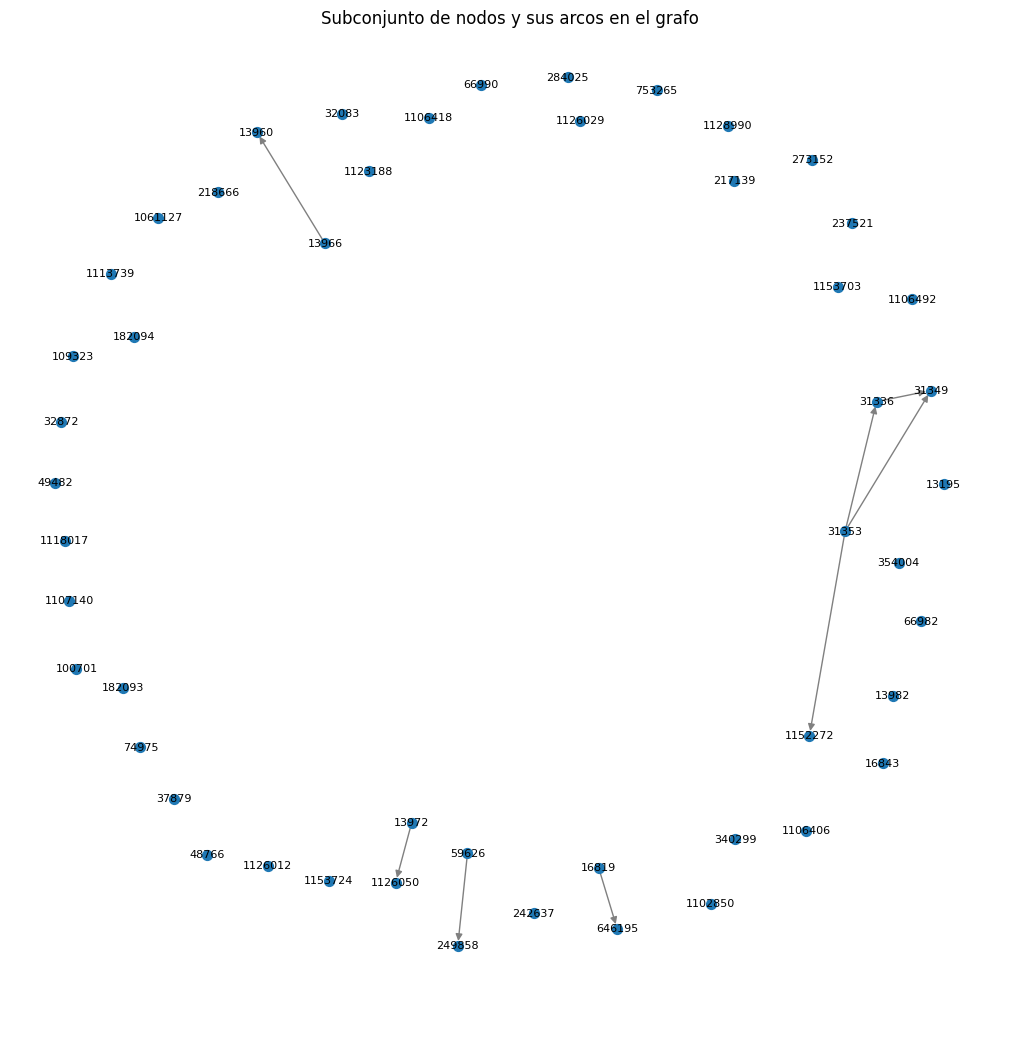

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (paper_id de cora_content)
G.add_nodes_from(cora_content[0])

# Agregar arcos (citas de cora_cites)
edges = list(cora_cites.itertuples(index=False, name=None))
G.add_edges_from(edges)

# Grado promedio
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f"El grado promedio de los nodos en el grafo es: {avg_degree:.2f}")

# Diámetro del componente más grande
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_largest_scc = G.subgraph(largest_scc)
diameter = nx.diameter(G_largest_scc)
print(f"El diámetro del componente más grande del grafo es: {diameter}")

# Densidad del grafo
density = nx.density(G)
print(f"La densidad de la matriz de adyacencia del grafo es: {density:.4f}")

# Graficar un subconjunto de nodos
subset_nodes = list(G.nodes())[:50]
G_subset = G.subgraph(subset_nodes)
plt.figure(figsize=(10, 10))
nx.draw(G_subset, with_labels=True, node_size=50, font_size=8, edge_color="gray")
plt.title("Subconjunto de nodos y sus arcos en el grafo")
plt.show()

#### Preguntas

Una vez instanciado el grafo, debes responder las siguientes preguntas utilizando NetworkX:

1. ¿Cuál es el grado promedio de los nodos en el grafo?

2. ¿Cuál es el diámetro del grafo?

3. ¿Cuál es la densidad de la matriz de adyacencia del grafo?

4. Realizar un gráfico mostrando los nodos (un subconjunto) y sus arcos respectivos

`Respuestas`
1. Grado promedio de los nodos (4.01): En promedio, cada paper en el grafo está citado por unos cuatro otros papers, o cita a otros cuatro. Esto significa que no hay muchas conexiones en general, lo cual es común en redes de citas, donde un paper solo hace referencia a unos pocos otros trabajos.

2. Diámetro del componente más grande (9): El "diámetro" nos dice qué tan lejos está el paper más lejano en el grupo de papers más interconectado. En este caso, se necesitan hasta 9 pasos (citas) para ir desde un paper a otro dentro de este grupo.

3. Densidad de la matriz de adyacencia (0.0007): La densidad es una medida de cuántas conexiones realmente existen en comparación con cuántas podrían existir. Un valor de 0.0007 significa que hay muy pocas conexiones posibles que se están usando en este grafo, lo que significa que solo algunos papers están directamente relacionados con otros.

4. Imagen del gráfico mostrado
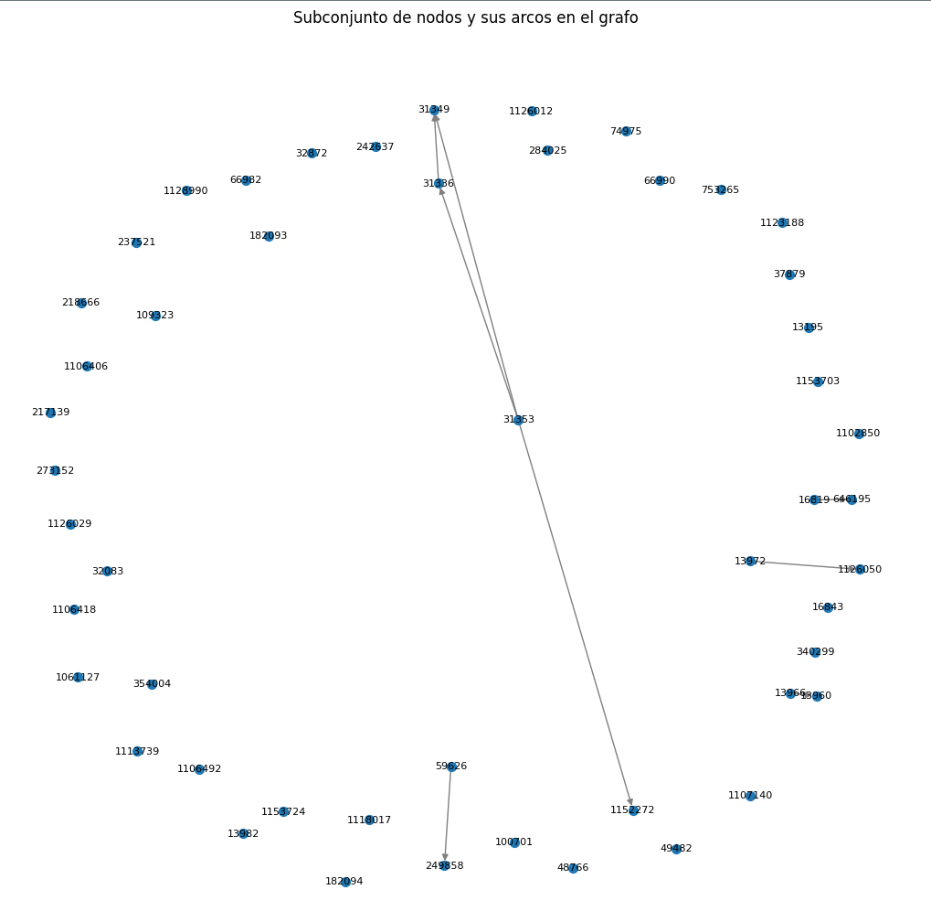




## 3) Split del dataset


Otro paso importante es realizar la partición de datos etiquetados en conjuntos de entrenamiento y test. Para esto, para cada etiqueta, se debe tomar la mitad de los papers para cada conjunto (50%).

In [ ]:
# Partición de datos en train y test como numpy array

In [ ]:
import pandas as pd
import numpy as np

# Cargar el dataset de Cora
cora_content = pd.read_csv('./data/cora/cora.content', header=None, sep='\t')

# Extraer las etiquetas y los IDs de los papers
paper_ids = cora_content[0].values  # IDs de los papers
labels = cora_content[1].values  # Etiquetas de los papers

# Crear un diccionario para almacenar los índices de los papers por etiqueta
label_dict = {}
for idx, label in enumerate(labels):
    if label not in label_dict:
        label_dict[label] = []
    label_dict[label].append(idx)

# Inicializar listas para los conjuntos de entrenamiento y prueba
train_indices = []
test_indices = []

# Dividir los datos en train y test
for indices in label_dict.values():
    np.random.shuffle(indices)  # Barajar los índices
    split_point = len(indices) // 2  # Encontrar el punto de división
    train_indices.extend(indices[:split_point])  # Primer mitad para train
    test_indices.extend(indices[split_point:])  # Segunda mitad para test

# Convertir listas a numpy arrays
train_indices = np.array(train_indices)
test_indices = np.array(test_indices)

# Mostrar la forma de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {len(train_indices)}')
print(f'Tamaño del conjunto de prueba: {len(test_indices)}')



Tamaño del conjunto de entrenamiento: 1354
Tamaño del conjunto de prueba: 1354


#### Preguntas

1. ¿En qué formato se encuentran almacenados los splits?
2. ¿Qué podría ocurrir si no realizamos la partición sobre cada etiqueta sino que sobre todo el conjunto de datos directamente (es decir, no haceerlo de manera estratificada)?
3. ¿Estamos en presencia de un contexto inductivo o transductivo?
4. Mencione un ejemplo de técnica de *data augmentation* que podría aplicar en este conjunto de datos.
5. Si tuviéramos los *timestamps* de cada paper (es decir, cuando se publicó cada paper), ¿podríamos usar esta información en este paso? Si es así, ¿cómo podríamos utilizar el momento de publicación de cada paper para particionar los datos?

`Respuestas`

1. Los splits (particiones) se almacenan como arrays de NumPy. Esto permite un manejo eficiente de los datos, ya que NumPy proporciona operaciones rápidas y eficientes para trabajar con grandes conjuntos de datos.

2. Si no se realiza una partición estratificada, es posible que algunos conjuntos (especialmente el de prueba) contengan una representación desproporcionada de ciertas etiquetas. Esto puede llevar a un modelo que se entrene de manera sesgada, lo que significa que podría funcionar bien en algunas clases y mal en otras. En resumen, se podría perder la diversidad de clases en los conjuntos de datos, afectando la capacidad del modelo para generalizar.

3. En este caso, estamos en un contexto inductivo. En el aprendizaje inductivo, se utiliza el entrenamiento para inferir reglas o patrones generales que se aplican a datos no vistos. Esto se opone al aprendizaje transductivo, donde el modelo se entrena con los mismos datos que se evalúan, sin inferir reglas generales.

4. Para un conjunto de datos como el de Cora, que consiste en papers científicos, una técnica de data augmentation podría ser la sinonimización de términos en los abstracts o descripciones de los papers. Esto implica reemplazar ciertas palabras con sus sinónimos para generar nuevas versiones de los textos. Otra técnica podría ser la perturbación de los vectores de características (features), donde se introducen ligeros cambios aleatorios en los valores binarios del vector de características para crear nuevas instancias de datos.

5. Sí, podríamos usar los timestamps para realizar una partición basada en el tiempo. Por ejemplo, podríamos dividir los datos en conjuntos de entrenamiento y prueba utilizando un enfoque cronológico, donde se usarían los papers publicados hasta una fecha específica para el conjunto de entrenamiento y los papers publicados después de esa fecha para el conjunto de prueba. Esto podría ayudar a evaluar el rendimiento del modelo en datos futuros, simulando un escenario más realista de cómo se comportaría al hacer predicciones sobre nuevos papers que no estaban disponibles durante el entrenamiento.

## 4) Creacion de la red

### GCN

En este paso, deberás crear una GCN. Para esto, deberás definir la clase `GraphConvLayer` que solo deberá recibir como parámetro la cantidad de capas ocultas a utilizar en el paso de cálculo de mensajes.

En esta implementación de la GCN, los pasos a implementar son:

$h_v^{(l)} = \text{ADD}(\text{MEAN}(\{W^{(l)} \times h_u^{(l-1)}, u\in N(v)\}), W^{(l)} \times h_v^{(l-1)})$

1. Cálculo del mensaje
2. Agregación de los mensajes de vecinos (usar promedio)
3. Actualizar *embedding* de cada nodo usando la suma de los mensajes agregados y la representación actual del nodo.

Por otra parte, para definir la GCN deberás definir la clase `GCNNodeClassifier`, que también recibirá como parámetro la cantidad de capas ocultas a utilizar.

Las capas del modelo `GCNNodeClassifier` que debes crear son:

1. Una sección de FFN que tenga `hidden_units` unidades ocultas
2. Una capa convolucional (`GraphConvLayer`) que reciba el parámetro `hidden_units`.
3. Una capa densa para clasificar las `num_classes` unidades.

Notar que cada capa densa de una FFN deberá utilizar *batch normalization*, *dropout* (0.3) y activación ReLU. Asegúrate que las capas internas sean parte del modelo.

In [ ]:
# Hiperparámetros GCN (definir como CONSTANTES)

In [ ]:
# Funciones auxiliares (por ejemplo, para crear una FNN)

In [ ]:
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras import Sequential

# def create_ffn(units):
#     model = Sequential()
#     model.add(Dense(units, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(DROPOUT_RATE))
#     return model

In [ ]:
# Clase GraphConvLayer

In [ ]:
import tensorflow as tf

class GraphConvLayer(tf.keras.layers.Layer):
    def __init__(self, hidden_units):
        super(GraphConvLayer, self).__init__()
        self.hidden_units = hidden_units

    def build(self, input_shape):
        # Inicializar los pesos W
        self.W = self.add_weight(shape=(input_shape[1][-1], self.hidden_units), initializer='glorot_uniform', trainable=True)

    def call(self, inputs):
        h, adj = inputs
        # Calcular mensajes de los vecinos
        h_neighbors = tf.matmul(adj, h)  # Multiplicar por la matriz de adyacencia
        h_neighbors = tf.matmul(h_neighbors, self.W)  # Aplicar pesos W

        # Calcular el nuevo embedding del nodo
        h_self = tf.matmul(h, self.W)  # Multiplicar el nodo consigo mismo
        h_new = tf.reduce_mean(h_neighbors, axis=1) + h_self  # Agregar
        return h_new

In [ ]:
# Clase GCNNodeClassifier

In [ ]:
# class GCNNodeClassifier(tf.keras.Model):
#     def __init__(self, num_classes, hidden_units):
#         super(GCNNodeClassifier, self).__init__()
#         self.ffn = create_ffn(hidden_units[0])
#         self.graph_conv_layer = GraphConvLayer(hidden_units[1])
#         self.output_layer = Dense(num_classes, activation='softmax')

#     def call(self, inputs):
#         h, adj = inputs
#         x = self.ffn(h)  # Pasar a través de la FFN
#         x = self.graph_conv_layer([x, adj])  # Pasar a través de la capa convolucional
#         return self.output_layer(x)  # Clasificación final

Crea una instancia de tu modelo que reciba la información del grafo, el número de clases, y `[8, 16]` como valor para `hidden_units`. Imprime las capas de tu instancia del modelo.

In [ ]:
# Creación de modelo e impresión de parámetros

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Hiperparámetros GCN
NUM_CLASSES = 7  # Número de clases en el dataset Cora
HIDDEN_UNITS = [8, 16]  # Unidades ocultas para las capas

# Funciones auxiliares
def create_ffn(hidden_units, dropout_rate=0.3):
    model = models.Sequential()
    for units in hidden_units:
        model.add(layers.Dense(units, activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
    return model

# Clase GraphConvLayer
class GraphConvLayer(layers.Layer):
    def __init__(self, num_hidden_units):
        super(GraphConvLayer, self).__init__()
        self.num_hidden_units = num_hidden_units

    def build(self, input_shape):
        # input_shape es una lista que contiene (h, adjacency_matrix)
        h_shape = input_shape[0]  # shape de las características del nodo
        self.W = self.add_weight(
            shape=(h_shape[-1], self.num_hidden_units),  # Weights for the layer
            initializer='glorot_uniform',
            trainable=True,
            name='weights'
        )

    def call(self, inputs):
        h, adjacency_matrix = inputs  # h: node features, adjacency_matrix: A
        # Calculando los mensajes (agregación)
        aggregated_messages = tf.matmul(adjacency_matrix, h)  # A * H
        # Aplicar W
        h_prime = tf.matmul(aggregated_messages, self.W)  # W * (A * H)
        # Actualizando embedding
        return h + h_prime  # h(l)v = h + h_prime

# Clase GCNNodeClassifier
class GCNNodeClassifier(models.Model):
    def __init__(self, num_classes, hidden_units):
        super(GCNNodeClassifier, self).__init__()
        self.ffn = create_ffn(hidden_units)
        self.graph_conv = GraphConvLayer(hidden_units[-1])  # Última capa oculta
        self.classifier = layers.Dense(num_classes, activation='softmax')

    def build(self, input_shape):
        # Aquí, input_shape es de la forma (None, num_features) para las características
        # y (None, num_nodes, num_nodes) para la matriz de adyacencia.
        self.graph_conv.build([input_shape[0], None])  # h y A
        self.ffn.build((None, self.graph_conv.num_hidden_units))
        self.classifier.build((None, self.graph_conv.num_hidden_units))

    def call(self, inputs):
        h, adjacency_matrix = inputs
        h = self.graph_conv([h, adjacency_matrix])  # Aplicar la GraphConvLayer
        h = self.ffn(h)  # Pasar a través de la FFN
        return self.classifier(h)  # Clasificación

# Creación del modelo
model = GCNNodeClassifier(NUM_CLASSES, HIDDEN_UNITS)

# Ahora usamos un shape adecuado para build: (None, 1433) para características y la matriz de adyacencia
model.build([(None, 1433), (None, None)])  # Asumiendo que la matriz de adyacencia aún no se define
print(model.summary())  # Imprimir las capas del modelo


Model: "gcn_node_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 16)                  │             376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ graph_conv_layer (GraphConvLayer)    │ ?                           │          22,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,423 (91.50 KB)

 Trainable params: 23,375 (91.31 KB)

 Non-trainable params: 48 (192.00 B)

None


In [ ]:
# Número de capas en el modelo
num_layers = len(model.layers)

# Número de parámetros entrenables en el modelo
num_trainable_params = model.count_params()

print(f"Número total de capas en el modelo: {num_layers}")
print(f"Número total de parámetros entrenables en el modelo: {num_trainable_params}")


Número total de capas en el modelo: 3
Número total de parámetros entrenables en el modelo: 23423


#### Preguntas

1. ¿Cuántas capas tiene, en total, el modelo?
2. ¿Cuántos parámetros entrenables tiene, en total, el modelo?

Respuestas

1. Número total de capas en el modelo: 3
* Esto incluye la capa de convolución (GraphConvLayer) y las capas densas.

2. Número total de parámetros entrenables en el modelo: 23,423
* Esto indica cuántos parámetros se ajustarán durante el entrenamiento del modelo.

### Sage

En este paso, deberás crear otra GCN. Para esto, deberás definir la clase `GraphSageLayer` que solo deberá recibir como parámetro la cantidad de capas ocultas a utilizar en el paso de cálculo de mensajes.

En esta implementación de la GCN, los pasos a implementar son:

$h_v^{(l)} = W^{(l)}\times \text{CONCAT}(h_v^{(l-1)}, \text{MEAN}(\{h_u^{(l-1)}, u\in N(v)\}))$

1. Agregación de los mensajes de vecinos (usar promedio)
2. Actualizar *embedding* de cada nodo usando la concatenación de los mensajes agregados y la representación actual del nodo.
3. Cálculo del mensaje

Por otra parte, para definir la GCN deberás definir la clase `GSNNodeClassifier`, que también recibirá como parámetro la cantidad de capas ocultas a utilizar.

Las capas del modelo `GSNNodeClassifier` que debes crear son:

1. Una sección de FFN que tenga `hidden_units` unidades ocultas
2. Una capa convolucional (`GraphSageLayer`) que reciba el parámetro `hidden_units`.
3. Una capa densa para clasificar las `num_classes` unidades.

Notar que cada capa densa de una FFN deberá utilizar *batch normalization*, *dropout* (0.3) y activación ReLU. Asegúrate que las capas internas sean parte del modelo.

In [ ]:
# Hiperparámetros GCN (definir como CONSTANTES)

In [ ]:
# Funciones auxiliares (por ejemplo, para crear una FNN)

In [ ]:
# Clase GraphSageLayer

In [ ]:
# Clase GSNNodeClassifier

Crea una instancia de tu modelo que reciba la información del grafo, el número de clases, y `[8, 16]` como valor para `hidden_units`. Imprime las capas de tu instancia del modelo.

In [ ]:
# Creación de modelo e impresión de parámetros

In [ ]:
import tensorflow as tf
import numpy as np

# Definición de los hiperparámetros
NUM_CLASSES = 7  # Número de clases en el dataset
HIDDEN_UNITS = [8, 16]  # Capas ocultas

# Función auxiliar para crear una red neuronal de avance (FFN)
def create_ffn(hidden_units):
    model = tf.keras.Sequential()
    for units in hidden_units:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.3))
    return model

# Clase GraphSageLayer
class GraphSageLayer(tf.keras.layers.Layer):
    def __init__(self, num_hidden_units):
        super(GraphSageLayer, self).__init__()
        self.num_hidden_units = num_hidden_units

    def build(self, input_shape):
        # La entrada es un tensor que contiene la representación del nodo y la de los vecinos
        self.W = self.add_weight(
            shape=(input_shape[0][-1] + input_shape[1][-1], self.num_hidden_units),  # Weights for the layer
            initializer='glorot_uniform',
            trainable=True,
        )

    def call(self, inputs):
        h_v, h_neighbors = inputs  # h_v: embedding del nodo, h_neighbors: embeddings de vecinos
        mean_neighbors = tf.reduce_mean(h_neighbors, axis=1)  # Promedio de los embeddings de los vecinos
        concat = tf.concat([h_v, mean_neighbors], axis=-1)  # Concatenar
        return tf.matmul(concat, self.W)  # Calcular el nuevo embedding

# Clase GSNNodeClassifier
class GSNNodeClassifier(tf.keras.Model):
    def __init__(self, num_classes, hidden_units):
        super(GSNNodeClassifier, self).__init__()
        self.ffn = create_ffn(hidden_units[:-1])  # Las unidades ocultas excepto la última
        self.graph_sage_layer = GraphSageLayer(hidden_units[-1])  # Última capa oculta
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def build(self, input_shape):
        # Construimos las capas internas para asegurarnos de que se inicialicen correctamente
        # La forma de entrada es (None, features) donde features es el tamaño de las características del nodo
        self.ffn.build((None, input_shape[0][-1]))  # Construir la FFN
        # La forma de entrada para graph_sage_layer es (node_features, neighbors_features)
        self.graph_sage_layer.build((input_shape[0], input_shape[1]))  # Construir GraphSageLayer
        self.classifier.build((None, HIDDEN_UNITS[-1]))  # Construir la capa de clasificación

    def call(self, inputs):
        h_v, h_neighbors = inputs  # h_v: embedding del nodo, h_neighbors: embeddings de vecinos
        h = self.ffn(h_v)  # Pasar por la FFN
        h = self.graph_sage_layer([h, h_neighbors])  # Pasar por la capa GraphSage
        return self.classifier(h)  # Clasificación final

# Creación del modelo
# Usamos (None, 1433) para las características del nodo y (None, 1433) para las características de los vecinos
model = GSNNodeClassifier(NUM_CLASSES, HIDDEN_UNITS)
model.build([(None, 1433), (None, 1433)])  # Dos entradas: características del nodo y características de los vecinos
print(model.summary())  # Imprimir las capas del modelo


Model: "gsn_node_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 8)                   │          11,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ graph_sage_layer (GraphSageLayer)    │ ?                           │          45,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,479 (224.53 KB)

 Trainable params: 57,463 (224.46 KB)

 Non-trainable params: 16 (64.00 B)

None


#### Preguntas

1. ¿Cuántas capas tiene, en total, el modelo?
2. ¿Cuántos parámetros entrenables tiene, en total, el modelo?

`Respuestas:`

1. El modelo tiene 3 capas en total:
 * Una capa secuencial
 * Una capa GraphSage
 * Una capa densa
2. El modelo tiene un total de 57,463 parámetros entrenables. Esto se refiere a los parámetros que el modelo ajustará durante el entrenamiento.

## 5) Entrenamiento de la red

Utiliza las instancias creadas para cada uno de los tipos de red y entrénalas utilizando los *splits* creados anteriormente.

Puedes utilizar la función de activación, optimizador, capas ocultas y learning rate que prefieras, pero debes entrenar por al menos 100 épocas y asegurarte de que la red efectivamente esté aprendiendo (la función de pérdida vaya bajando al menos al inicio del entrenamiento).

Se debe graficar tanto el progreso de la pérdida como el *accuracy* durante el proceso de entrenamiento y mostrar el *accuracy* logrado sobre los datos del *split* de *test*.

In [ ]:
# Funciones auxiliares

In [ ]:
# Entrenamiento de red GCN

In [ ]:
# Gráficos red GCN

In [ ]:
# Accuracy en test de GCN

In [ ]:
# Entrenamiento de red GSN

In [ ]:
# Gráficos red GSN

In [ ]:
# Accuracy en test de GSN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Cargar el dataset de Cora
cora_content = pd.read_csv('./data/cora/cora.content', header=None, sep='\t')

# Verificar las primeras filas del DataFrame para entender su estructura
print(cora_content.head())

# Identificar las columnas que contienen solo datos numéricos
numeric_cols = cora_content.select_dtypes(include=[np.number]).columns

# Asegúrate de que tus datos de características estén correctamente preprocesados y en forma adecuada
# Usar solo columnas numéricas
x_train = cora_content.iloc[train_indices][numeric_cols].values.astype(np.float32)
y_train = np.array([np.where(np.unique(labels) == label)[0][0] for label in labels[train_indices]]).astype(np.int32)  # Convertir etiquetas a índices
x_test = cora_content.iloc[test_indices][numeric_cols].values.astype(np.float32)
y_test = np.array([np.where(np.unique(labels) == label)[0][0] for label in labels[test_indices]]).astype(np.int32)  # Convertir etiquetas a índices


      0     1     2     3     4     5     6     7     8     9     ...  1425  \
0    31336     0     0     0     0     0     0     0     0     0  ...     0   
1  1061127     0     0     0     0     0     0     0     0     0  ...     0   
2  1106406     0     0     0     0     0     0     0     0     0  ...     0   
3    13195     0     0     0     0     0     0     0     0     0  ...     0   
4    37879     0     0     0     0     0     0     0     0     0  ...     0   

   1426  1427  1428  1429  1430  1431  1432  1433                    1434  
0     0     1     0     0     0     0     0     0         Neural_Networks  
1     1     0     0     0     0     0     0     0           Rule_Learning  
2     0     0     0     0     0     0     0     0  Reinforcement_Learning  
3     0     0     0     0     0     0     0     0  Reinforcement_Learning  
4     0     0     0     0     0     0     0     0   Probabilistic_Methods  

[5 rows x 1435 columns]


### Preguntas

1. ¿Qué combinación de red obtiene mejor accuracy?
2. Comparando los dos tipos de red, ¿Es significativa la diferencia entre los accuracy?

## 6) [Opcional] Desafío

Crea una red de tipo GNN utilizando cualquier arquitectura de las vistas, es decir, puede elegir libremente la configuración de las FNN, tasa de *dropout*, funciones de agregación y actualización, etc.

También puede utilizar alguna técnica de *data augmentation* de las mencionadas en clases.

Está prohibido utilizar cualquier librería externa que implemente alguna capa de su GNN, solo crea tu propia implementación (tal como se realizó anteriormente).

**El desafío consiste en superar por al menos un punto porcentual el rendimiento obtenido por las redes anteriores**

In [ ]:
# Libre